In [1]:
from alphabet import load_alphabet, char_token
from synthetic import create_alphabet_image
import numpy as np
from pathlib import Path
import tqdm as tqdm
from gan.Hdataset import load_hebrew_dataset
from PIL import Image

In [13]:
dataaset = load_hebrew_dataset('data/alphabet/')
#test = np.concatenate([row for row in dataaset])
print(len(dataaset))

27


In [27]:
raw_alphabet = load_alphabet()

Class sizes: [300, 300, 300, 300, 300, 10, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]
Total number of classes: 27


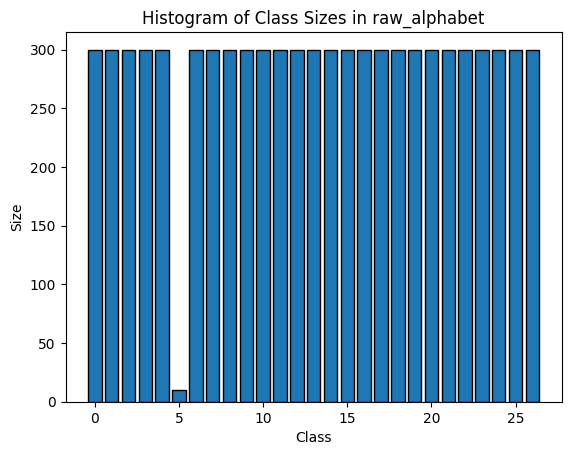

In [28]:
import matplotlib.pyplot as plt

# Calculate the size of each class
class_sizes = [len(raw_alphabet[cls]) for cls in raw_alphabet]

print("Class sizes:", class_sizes)
print("Total number of classes:", len(raw_alphabet))

# Plot the histogram
plt.bar(range(len(raw_alphabet)),class_sizes, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Size')
plt.title('Histogram of Class Sizes in raw_alphabet')
plt.show()

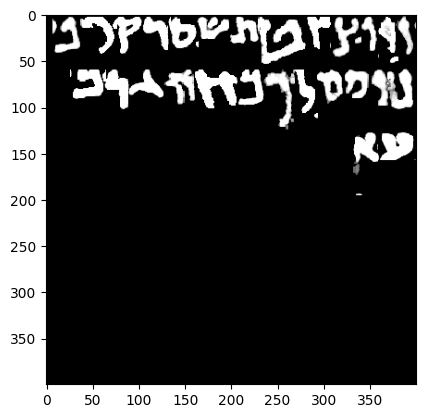

In [5]:
letters = list(char_token.keys())[:len(raw_alphabet)]	
sample = create_alphabet_image(letters, (400,400), raw_alphabet)
plt.imshow(sample.image, cmap="Greys")
plt.show()

In [32]:
reverse_class = [np.max(class_sizes)-cs for cs in class_sizes]

for i, ammount in enumerate(reverse_class):
    let = f'{letters[i]}'.split(".")[1].replace("_", "-")
    if let == 'Kaf-final':
        continue
    file_count = len(list(Path(f"data/alphabet/{let}").glob("*.pgm")))
    ammount = 300 - file_count
    if ammount > 0:
        print(f"Class {i} has {ammount} missing samples. {letters[i]}")
        for j in range(ammount):
            sample = create_alphabet_image([letters[i]], (200,200), raw_alphabet)
            # sample.image.save(f"missing_samples/class_{i}_sample_{j}.png")
            # plt.imshow(sample.image, cmap="Greys")
            path = Path(f"missing_samples/{let}")
            path.mkdir(parents=True, exist_ok=True)
            out = Image.fromarray(sample.image)
            out.save(f"data/alphabet/{let}/syntetic_{j}.pgm")
            # plt.imshow(out, cmap="Greys")
            # plt.axis('off')
            # plt.savefig(f"missing_samples/{let}/sample_{j}.png",bbox_inches='tight')
            # print(f"Saved missing sample {j} for class {i}.")

Class 3 has 209 missing samples. A.Dalet
Class 7 has 107 missing samples. A.Kaf
Class 9 has 6 missing samples. A.Lamed
Class 12 has 170 missing samples. A.Nun_final
Class 14 has 263 missing samples. A.Pe
Class 15 has 285 missing samples. A.Pe_final
Class 16 has 35 missing samples. A.Qof
Class 17 has 222 missing samples. A.Resh
Class 22 has 227 missing samples. A.Tsadi_final
Class 24 has 184 missing samples. A.Waw
Class 25 has 277 missing samples. A.Yod
Class 26 has 288 missing samples. A.Zayin


In [ ]:
dataaset = load_hebrew_dataset('data/alphabet/')
print(dataaset.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (27,) + inhomogeneous part.

In [ ]:
import os

def delete_sample_images(root_folder):
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.startswith("syntetic_"):
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)
                    print(f"Deleted: {file_path}")
                except Exception as e:
                    print(f"Error deleting {file_path}: {e}")

# Specify the root folder
root_folder = "data/alphabet/"
delete_sample_images(root_folder)

Deleted: data/alphabet/Tsadi-final/syntetic_24.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_128.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_203.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_131.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_92.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_212.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_173.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_222.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_205.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_6.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_119.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_54.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_34.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_218.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_143.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_226.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_43.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_75.pgm
Deleted: data/alphabet/Tsadi-final/syntetic_11.pgm
Deleted: data/alphabe